<a href="https://colab.research.google.com/github/Haque14/MSE504/blob/main/rho_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mu = -1.00, phi = -3.14, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -2.81, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -2.48, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -2.15, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -1.82, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -1.49, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -1.16, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -0.83, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -0.50, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = -0.17, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = 0.17, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = 0.50, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = 0.83, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = 1.16, incidence angle = 0.00 degrees, Rho = 0.0083
mu = -1.00, phi = 1.49, 

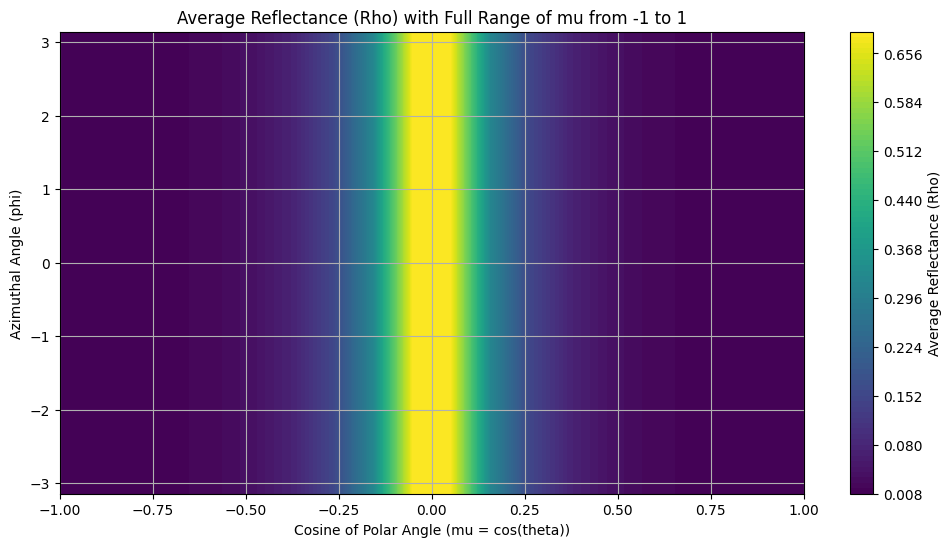

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n1 = 1.0   # Refractive index of the first medium (e.g., air)
n2 = 1.2   # Refractive index of the second medium (e.g., glass)

# Define mu (cosine of the polar angle) ranging from -1 to 1
mu_values = np.linspace(-1, 1, 20)  # Increased points for full range demonstration
# Define phi (azimuthal angle) ranging from -pi to pi
phi_values = np.linspace(-np.pi, np.pi, 20)

# Initialize array to store the results
Rho_values = np.zeros((len(mu_values), len(phi_values)))

# Define the getRho function
def getRho(incident_angle, refractive_angle, n1, n2):
    """
    Compute the average reflectance (Rho) using Fresnel equations.
    """
    # Fresnel reflection coefficients for perpendicular polarization
    r_perp = (n1 * np.cos(incident_angle) - n2 * np.cos(refractive_angle)) / \
             (n1 * np.cos(incident_angle) + n2 * np.cos(refractive_angle))

    # Fresnel reflection coefficients for parallel polarization
    r_parallel = (n2 * np.cos(incident_angle) - n1 * np.cos(refractive_angle)) / \
                 (n2 * np.cos(incident_angle) + n1 * np.cos(refractive_angle))

    # Reflectance for perpendicular and parallel polarizations
    R_perp = np.abs(r_perp)**2
    R_parallel = np.abs(r_parallel)**2

    # Average Reflectance (Rho)
    Rho = (R_perp + R_parallel) / 2
    return Rho

# Helper function to compute the surface normal vector
def surface_normal():
    # Assuming the normal vector is along the z-axis (standard for a flat surface)
    return np.array([0, 0, 1])

# Helper function to compute the incident light direction vector
def incident_light_direction(mu, phi):
    # Convert spherical coordinates (mu, phi) to Cartesian coordinates
    x = np.sqrt(1 - mu**2) * np.cos(phi)
    y = np.sqrt(1 - mu**2) * np.sin(phi)
    z = mu
    return np.array([x, y, z])

# Helper function to calculate the incidence angle using the base (surface normal) and incident beam
def calculate_incidence_angle(mu):
    # Calculate the incidence angle using the absolute value of mu
    return np.arccos(np.clip(np.abs(mu), 0, 1))

# Loop over all mu and phi values
for i, mu in enumerate(mu_values):
    for j, phi in enumerate(phi_values):
        # Compute the surface normal (constant in this case)
        normal = surface_normal()
        # Compute the incident light direction based on mu and phi
        light_dir = incident_light_direction(mu, phi)
        # Calculate the incidence angle using the absolute value of mu
        theta_inc = calculate_incidence_angle(mu)

        # Snell's law to calculate the refractive angle
        sin_theta_trans = n1 / n2 * np.sin(theta_inc)
        # Handling total internal reflection cases
        if np.abs(sin_theta_trans) > 1:
            # Total internal reflection, Rho = 1
            Rho = 1.0
        else:
            theta_trans = np.arcsin(sin_theta_trans)
            # Compute the average reflectance (Rho) using getRho function
            Rho = getRho(theta_inc, theta_trans, n1, n2)

        # Store the Rho value and print the incidence angle and Rho value
        Rho_values[i, j] = Rho
        print(f"mu = {mu:.2f}, phi = {phi:.2f}, incidence angle = {np.degrees(theta_inc):.2f} degrees, Rho = {Rho:.4f}")

# Create a meshgrid for plotting
MU, PHI = np.meshgrid(mu_values, phi_values)

# Plotting the average reflectance (Rho) as a function of mu and phi
plt.figure(figsize=(12, 6))
plt.contourf(MU, PHI, Rho_values.T, levels=100, cmap='viridis')
plt.colorbar(label='Average Reflectance (Rho)')
plt.xlabel("Cosine of Polar Angle (mu = cos(theta))")
plt.ylabel("Azimuthal Angle (phi)")
plt.title("Average Reflectance (Rho) with Full Range of mu from -1 to 1")
plt.grid(True)
plt.show()
